In [1]:
import cv2

In [2]:
classNames = []
classFile = 'coco.names'
with open(classFile,'rt') as f:
classNames = f.read().rstrip('\n').split('\n')


class names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse' .......]

In [3]:
configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = 'frozen_inference_graph.pb'

In [4]:
net = cv2.dnn_DetectionModel(weightsPath, configPath)
net.setInputSize(320, 320)
net.setInputScale(1.0 / 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

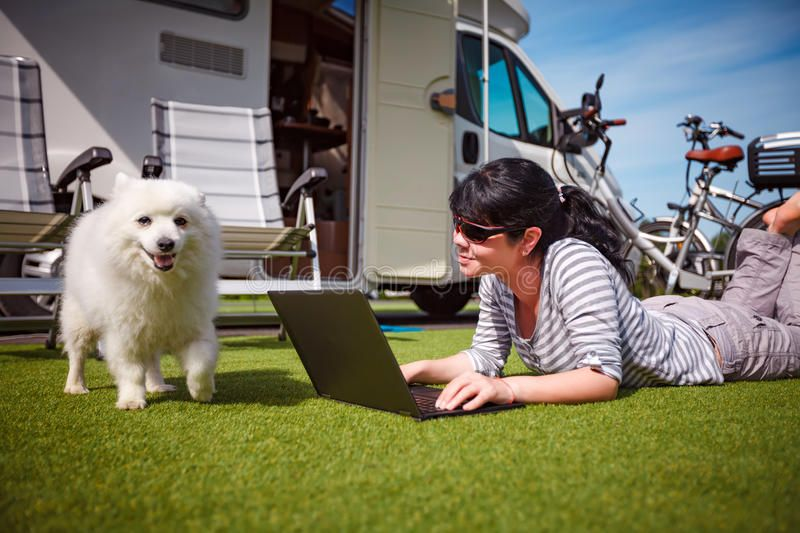

In [5]:
img = cv2.imread("objects.jpg")
cv2.imshow("output",img)

In [6]:
classIds, confs, bbox = net.detect(img, confThreshold=0.5)

classIds = [ 1 18  8  2 73]
bbox = [[397 151 401 266] [ 53 161 171 247] [  9   3 643 336] [449  41 320 275] [252 279 288 141]]

In [7]:
if len(classIds) != 0:
   for classId, confidence, box in zip(classIds.flatten(), confs.flatten(), bbox):
     cv2.rectangle(img, box, color=(0, 255, 0), thickness=2)
     cv2.putText(img, classNames[classId - 1].upper(), (box[0] + 10, box[1] + 30),cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
     cv2.putText(img, str(round(confidence * 100, 2))+"%", (box[0] + 161, box[1] + 30),cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

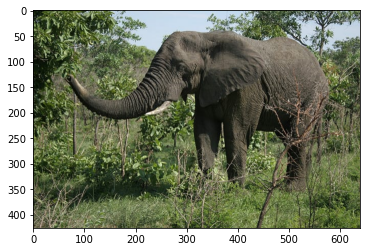

In [8]:
cv2.imshow("Output", img)
cv2.waitKey(0)